In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7c32c3054b424839a29766ca97b64991',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2026-01-11T10:37:51.221Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 8957}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12513, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [9]:
import pandas as pd

df = pd.DataFrame()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
# Make the data visually pleasing in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now') # Added column for timestamp
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12513,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.997447e+07,1.997447e+07,False,1.809656e+12,NaN,1,NaN,NaN,None,2026-01-11T10:36:00.000Z,90598.462649,1.201554e+10,-61.4268,-0.012815,-0.054120,-0.951858,-2.024791,-13.679925,-21.173585,1.809656e+12,58.4310,1.902568e+12,None,2026-01-11T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:40:31.406674
1,1027,Ethereum,ETH,ethereum,11377,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206947e+08,1.206947e+08,True,3.745022e+11,NaN,2,NaN,NaN,None,2026-01-11T10:36:00.000Z,3102.887615,6.532161e+09,-56.9768,0.098661,0.377919,-1.262138,-4.441578,-12.338827,-25.271086,3.745022e+11,12.0920,3.745022e+11,None,2026-01-11T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:40:31.406674
2,825,Tether USDt,USDT,tether,165827,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.869664e+11,1.908427e+11,True,1.905932e+11,NaN,3,NaN,NaN,None,2026-01-11T10:36:00.000Z,0.998693,3.755502e+10,-43.9633,-0.013357,-0.000067,-0.083470,-0.135832,-0.141845,-0.186607,1.867220e+11,6.0290,1.905932e+11,None,2026-01-11T10:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-11 18:40:31.406674
3,52,XRP,XRP,xrp,1778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.069997e+10,9.998573e+10,False,2.089538e+11,NaN,4,NaN,NaN,None,2026-01-11T10:36:00.000Z,2.089836,1.124224e+09,-58.9141,-0.114738,-0.275072,0.210351,2.630247,-13.953483,-19.592913,1.268530e+11,4.0959,2.089836e+11,None,2026-01-11T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:40:31.406674
4,1839,BNB,BNB,bnb,3066,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377340e+08,1.377340e+08,1.377340e+08,False,1.255790e+11,NaN,5,NaN,NaN,None,2026-01-11T10:36:00.000Z,911.750534,1.834696e+09,-2.0162,-0.226449,1.206606,2.842971,2.836193,-6.170582,-30.481152,1.255790e+11,4.0548,1.255790e+11,None,2026-01-11T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:40:31.406674
5,5426,Solana,SOL,solana,1070,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.645803e+08,6.180924e+08,True,8.426386e+10,NaN,6,5.252369e+08,7.160497e+10,None,2026-01-11T10:36:00.000Z,136.328901,1.570550e+09,-58.2355,-0.143161,-0.044692,1.497044,-1.340243,-14.695126,-30.348836,7.696861e+10,2.4852,8.426386e+10,None,2026-01-11T10:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:40:31.406674
6,3408,USDC,USDC,usd-coin,36236,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.467638e+10,7.467638e+10,False,7.466071e+10,NaN,7,6.090122e+10,6.088844e+10,None,2026-01-11T10:36:00.000Z,0.999790,3.510117e+09,-57.1640,0.006522,0.008067,0.008798,-0.013025,-0.020485,0.004527,7.466071e+10,2.4107,7.466071e+10,None,2026-01-11T10:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-11 18:40:31.406674
7,1958,TRON,TRX,tron,1276,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.470331e+10,9.470330e+10,True,2.829764e+10,NaN,8,9.466789e+10,2.828706e+10,None,2026-01-11T10:36:00.000Z,0.298803,5.360070e+08,-13.0888,-0.015663,0.394976,1.819306,7.695754,-0.110687,-7.009907,2.829764e+10,0.9137,2.829764e+10,None,2

In [26]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7c32c3054b424839a29766ca97b64991',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now') # Added column for timestamp
    df 

    # Saving the dataframe as CSV 
    
    # Check if a file has similar name
    if not os.path.isfile(r'C:\Users\angel\Automate_Crypto\API.csv'):
        df.to_csv(r'C:\Users\angel\Automate_Crypto\API.csv', index=False, header='column_names') #Creates a new file
    else:
        df.to_csv(r'C:\Users\angel\Automate_Crypto\API.csv', mode='a', index=False, header=False) # If file is existing, file will append w/o repeating headers

In [25]:
import os 
from time import time, sleep

for i in range(3):
    api_runner()
    print(f'API Runner Completed: {i + 1}')
    sleep(10) # Sleep for 10secs for testing 

API Runner Completed: 1
API Runner Completed: 2
API Runner Completed: 3


In [27]:
df3 = pd.read_csv(r'C:\Users\angel\Automate_Crypto\API.csv')

In [28]:
df3

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12513,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.997447e+07,1.997447e+07,False,1.809918e+12,NaN,1,NaN,NaN,NaN,2026-01-11T10:54:00.000Z,90611.550256,1.200198e+10,-61.3901,-0.018091,-0.087389,-1.025377,-2.101382,-13.617045,-21.183219,1.809918e+12,58.4422,1.902843e+12,NaN,2026-01-11T10:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:56:35.683686
1,1027,Ethereum,ETH,ethereum,11377,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206947e+08,1.206947e+08,True,3.744773e+11,NaN,2,NaN,NaN,NaN,2026-01-11T10:54:00.000Z,3102.681401,6.490741e+09,-57.3573,0.063387,0.241993,-1.329982,-4.433395,-12.217203,-25.366243,3.744773e+11,12.0902,3.744773e+11,NaN,2026-01-11T10:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:56:35.683686
2,825,Tether USDt,USDT,tether,165828,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.869664e+11,1.908427e+11,True,1.905952e+11,NaN,3,NaN,NaN,NaN,2026-01-11T10:54:00.000Z,0.998703,3.749286e+10,-44.0455,0.002803,-0.006915,-0.075510,-0.142787,-0.144318,-0.217422,1.867240e+11,6.0293,1.905952e+11,NaN,2026-01-11T10:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-11 18:56:35.683686
3,52,XRP,XRP,xrp,1778,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.069997e+10,9.998573e+10,False,2.089785e+11,NaN,4,NaN,NaN,NaN,2026-01-11T10:54:00.000Z,2.090083,1.116636e+09,-59.2468,-0.023988,-0.534999,0.121392,2.528592,-13.869480,-19.643128,1.268680e+11,4.0966,2.090083e+11,NaN,2026-01-11T10:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:56:35.683686
4,1839,BNB,BNB,bnb,3066,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.377340e+08,1.377340e+08,1.377340e+08,False,1.256023e+11,NaN,5,NaN,NaN,NaN,2026-01-11T10:54:00.000Z,911.919338,1.831537e+09,-2.5127,0.035336,1.300361,2.868084,2.926925,-6.199700,-30.638952,1.256023e+11,4.0557,1.256023e+11,NaN,2026-01-11T10:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:56:35.683686
5,5426,Solana,SOL,solana,1070,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.645802e+08,6.180924e+08,True,8.432333e+10,NaN,6,5.252369e+08,7.165550e+10,NaN,2026-01-11T10:54:00.000Z,136.425118,1.548543e+09,-59.0592,0.092224,-0.276351,1.292422,-1.442063,-14.765346,-30.153326,7.702293e+10,2.4871,8.432333e+10,NaN,2026-01-11T10:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:56:35.683686
6,3408,USDC,USDC,usd-coin,36236,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.467468e+10,7.467468e+10,False,7.465985e+10,NaN,7,6.090122e+10,6.088913e+10,NaN,2026-01-11T10:54:00.000Z,0.999801,3.523286e+09,-56.4446,0.013866,0.010665,0.005210,-0.012261,-0.027859,-0.017602,7.465985e+10,2.4108,7.465985e+10,NaN,2026-01-11T10:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-11 18:56:35.683686
7,1958,TRON,TRX,tron,1276,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.470337e+10,9.470336e+10,True,2.828453e+10,NaN,8,9.466789e+10,2.827393e+10,NaN,2026-01-11T10:54:00.000Z,0.298664,5.411443e+08,-11.4535,0.016509,0.365756,1.789461,7.641617,-0.215443,-7.170001,2.828453e+10,0.9133,2.828453e+10,NaN,2026-01-11T10:54:00.

In [33]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12513,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19974468.00000,19974468.00000,False,1809917511021.78003,NaN,1,NaN,NaN,None,2026-01-11T10:54:00.000Z,90611.55026,12001975741.06319,-61.39010,-0.01809,-0.08739,-1.02538,-2.10138,-13.61704,-21.18322,1809917511021.78442,58.44220,1902842555379.07007,None,2026-01-11T10:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:56:57.298906
1,1027,Ethereum,ETH,ethereum,11377,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120694726.60457,120694726.60457,True,374477283418.58002,NaN,2,NaN,NaN,None,2026-01-11T10:54:00.000Z,3102.68140,6490741050.35396,-57.35730,0.06339,0.24199,-1.32998,-4.43339,-12.21720,-25.36624,374477283418.58423,12.09020,374477283418.58002,None,2026-01-11T10:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:56:57.298906
2,825,Tether USDt,USDT,tether,165828,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,186966394639.43137,190842659097.00711,True,190595209741.85999,NaN,3,NaN,NaN,None,2026-01-11T10:54:00.000Z,0.99870,37492856453.09061,-44.04550,0.00280,-0.00692,-0.07551,-0.14279,-0.14432,-0.21742,186723971304.90918,6.02930,190595209741.85999,None,2026-01-11T10:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-11 18:56:57.298906
3,52,XRP,XRP,xrp,1778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60699967552.00000,99985731168.00000,False,208978520747.94000,NaN,4,NaN,NaN,None,2026-01-11T10:54:00.000Z,2.09008,1116636347.80119,-59.24680,-0.02399,-0.53500,0.12139,2.52859,-13.86948,-19.64313,126867996865.98309,4.09660,209008343797.38000,None,2026-01-11T10:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:56:57.298906
4,1839,BNB,BNB,bnb,3066,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137733953.63000,137733953.63000,137733953.63000,False,125602255762.92000,NaN,5,NaN,NaN,None,2026-01-11T10:54:00.000Z,911.91934,1831536650.48549,-2.51270,0.03534,1.30036,2.86808,2.92692,-6.19970,-30.63895,125602255762.92242,4.05570,125602255762.92000,None,2026-01-11T10:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:56:57.298906
5,5426,Solana,SOL,solana,1070,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,564580246.33145,618092411.96571,True,84323330030.56000,NaN,6,525236893.30000,71655504970.70520,None,2026-01-11T10:54:00.000Z,136.42512,1548543306.08770,-59.05920,0.09222,-0.27635,1.29242,-1.44206,-14.76535,-30.15333,77022926537.37549,2.48710,84323330030.56000,None,2026-01-11T10:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-11 18:56:57.298906
6,3408,USDC,USDC,usd-coin,36236,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,74674680989.88455,74674680989.88455,False,74659853042.34000,NaN,7,60901219650.23000,60889126661.30324,None,2026-01-11T10:54:00.000Z,0.99980,3523285987.93187,-56.44460,0.01387,0.01066,0.00521,-0.01226,-0.02786,-0.01760,74659853042.34087,2.41080,74659853042.34000,None,2026-01-11T10:54:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-11 18:56:57.298906
7,1958,TRON,TRX,tron,1276,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94703367231.25267,94703361

In [37]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h',
                                     'quote.USD.percent_change_24h', 
                                     'quote.USD.percent_change_7d', 
                                     'quote.USD.percent_change_30d',
                                     'quote.USD.percent_change_60d',
                                    'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.01809,-0.08739,-1.02538,-2.10138,-13.61704,-21.18322
Ethereum,0.06339,0.24199,-1.32998,-4.43339,-12.21720,-25.36624
Tether USDt,0.00280,-0.00692,-0.07551,-0.14279,-0.14432,-0.21742
XRP,-0.02399,-0.53500,0.12139,2.52859,-13.86948,-19.64313
BNB,0.03534,1.30036,2.86808,2.92692,-6.19970,-30.63895
Solana,0.09222,-0.27635,1.29242,-1.44206,-14.76535,-30.15333
USDC,0.01387,0.01066,0.00521,-0.01226,-0.02786,-0.01760
TRON,0.01651,0.36576,1.78946,7.64162,-0.21544,-7.17000
Dogecoin,-0.00331,-0.33699,-8.18973,-0.94986,-20.73042,-33.37843


In [44]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.01809
              quote.USD.percent_change_24h    -0.08739
              quote.USD.percent_change_7d     -1.02538
              quote.USD.percent_change_30d    -2.10138
              quote.USD.percent_change_60d   -13.61704
              quote.USD.percent_change_90d   -21.18322
Ethereum      quote.USD.percent_change_1h      0.06339
              quote.USD.percent_change_24h     0.24199
              quote.USD.percent_change_7d     -1.32998
              quote.USD.percent_change_30d    -4.43339
              quote.USD.percent_change_60d   -12.21720
              quote.USD.percent_change_90d   -25.36624
Tether USDt   quote.USD.percent_change_1h      0.00280
              quote.USD.percent_change_24h    -0.00692
              quote.USD.percent_change_7d     -0.07551
              quote.USD.percent_change_30d    -0.14279
              quote.USD.percent_change_60d    -0.14432
              quote.US

In [47]:
df5 = df5.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.01809
             quote.USD.percent_change_24h  -0.08739
             quote.USD.percent_change_7d   -1.02538
             quote.USD.percent_change_30d  -2.10138
             quote.USD.percent_change_60d -13.61704
             quote.USD.percent_change_90d -21.18322
Ethereum     quote.USD.percent_change_1h    0.06339
             quote.USD.percent_change_24h   0.24199
             quote.USD.percent_change_7d   -1.32998
             quote.USD.percent_change_30d  -4.43339
             quote.USD.percent_change_60d -12.21720
             quote.USD.percent_change_90d -25.36624
Tether USDt  quote.USD.percent_change_1h    0.00280
             quote.USD.percent_change_24h  -0.00692
             quote.USD.percent_change_7d   -0.07551
             quote.USD.percent_change_30d  -0.14279
             quote.USD.percent_change_60d  -0.14432
             quote.USD.percent_change_90d  -0.21742
XRP          quote.USD.percent_change_1h   -0.02399
             quote.USD.percent_change_24h  -0.53500
             quote.USD.percent_change_7d    0.12139
             quote.USD.percent_change_30d   2.52859
             quote.USD.percent_change_60d -13.86948
             quote.USD.percent_change_90d -19.64313
BNB          quote.USD.percent_change_1h    0.03534
             quote.USD.percent_change_24h   1.30036
             quote.USD.percent_change_7d    2.86808
             quote.USD.percent_change_30d   2.92692
             quote.USD.percent_change_60d  -6.19970
             quote.USD.percent_change_90d -30.63895
Solana       quote.USD.percent_change_1h    0.09222
             quote.USD.percent_change_24h  -0.27635
             quote.USD.percent_change_7d    1.29242
             quote.USD.percent_change_30d  -1.44206
             quote.USD.percent_change_60d -14.76535
             quote.USD.percent_change_90d -30.15333
USDC         quote.USD.percent_change_1h    0.01387
             quote.USD.percent_change_24h   0.01066
             quote.USD.percent_change_7d    0.00521
             quote.USD.percent_change_30d  -0.01226
             quote.USD.percent_change_60d  -0.02786
             quote.USD.percent_change_90d  -0.01760
TRON         quote.USD.percent_change_1h    0.01651
             quote.USD.percent_change_24h   0.36576
             quote.USD.percent_change_7d    1.78946
             quote.USD.percent_change_30d   7.64162
             quote.USD.percent_change_60d  -0.21544
             quote.USD.percent_change_90d  -7.17000
Dogecoin     quote.USD.percent_change_1h   -0.00331
             quote.USD.percent_change_24h  -0.33699
             quote.USD.percent_change_7d   -8.18973
             quote.USD.percent_change_30d  -0.94986
             quote.USD.percent_change_60d -20.73042
             quote.USD.percent_change_90d -33.37843
Cardano      quote.USD.percent_change_1h   -0.18517
             quote.USD.percent_change_24h  -0.06445
             quote.USD.percent_change_7d   -3.14527
             quote.USD.percent_change_30d  -8.57352
             quote.USD.percent_change_60d -31.75806
             quote.USD.percent_change_90d -45.55086
Bitcoin Cash quote.USD.percent_change_1h    0.92582
             quote.USD.percent_change_24h   2.82026
             quote.USD.percent_change_7d    1.01218
             quote.USD.percent_change_30d  12.65870
             quote.USD.percent_change_60d  26.24011
             quote.USD.percent_change_90d  21.13455
Chainlink    quote.USD.percent_change_1h    0.03592
             quote.USD.percent_change_24h   0.06389
             quote.USD.percent_change_7d   -1.17983
             quote.USD.percent_change_30d  -6.31655
             quote.USD.percent_change_60d -16.99742
             quote.USD.percent_change_90d -33.01803
Monero       quote.USD.percent_change_1h    1.67447
             quote.USD.percent_change_24h   8.76511
             quote.USD.percent_change_7d   14.57048
             quote.USD.percent_change_30d

In [50]:
df5.count()

values    90
dtype: int64

In [54]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01809
1,Bitcoin,quote.USD.percent_change_24h,-0.08739
2,Bitcoin,quote.USD.percent_change_7d,-1.02538
3,Bitcoin,quote.USD.percent_change_30d,-2.10138
4,Bitcoin,quote.USD.percent_change_60d,-13.61704
5,Bitcoin,quote.USD.percent_change_90d,-21.18322
6,Ethereum,quote.USD.percent_change_1h,0.06339
7,Ethereum,quote.USD.percent_change_24h,0.24199
8,Ethereum,quote.USD.percent_change_7d,-1.32998
9,Ethereum,quote.USD.percent_change_30d,-4.43339


In [58]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01809
1,Bitcoin,quote.USD.percent_change_24h,-0.08739
2,Bitcoin,quote.USD.percent_change_7d,-1.02538
3,Bitcoin,quote.USD.percent_change_30d,-2.10138
4,Bitcoin,quote.USD.percent_change_60d,-13.61704
5,Bitcoin,quote.USD.percent_change_90d,-21.18322
6,Ethereum,quote.USD.percent_change_1h,0.06339
7,Ethereum,quote.USD.percent_change_24h,0.24199
8,Ethereum,quote.USD.percent_change_7d,-1.32998
9,Ethereum,quote.USD.percent_change_30d,-4.43339


In [77]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 
                                                       'quote.USD.percent_change_24h',
                                                       'quote.USD.percent_change_7d',
                                                       'quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d',
                                                       'quote.USD.percent_change_90d'], ['1h','24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.01809
1,Bitcoin,24h,-0.08739
2,Bitcoin,7d,-1.02538
3,Bitcoin,30d,-2.10138
4,Bitcoin,60d,-13.61704
5,Bitcoin,90d,-21.18322
6,Ethereum,1h,0.06339
7,Ethereum,24h,0.24199
8,Ethereum,7d,-1.32998
9,Ethereum,30d,-4.43339


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

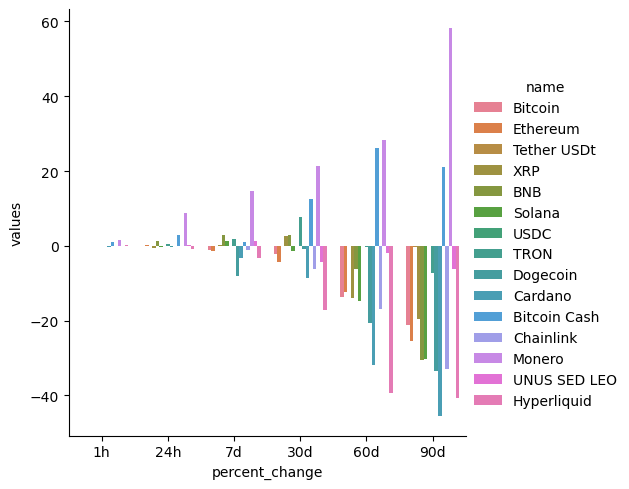

In [78]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='bar')

In [86]:
# Select columns only

df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8.query("name == 'Bitcoin'" )

,name,quote.USD.price,timestamp
0,Bitcoin,90611.55026,2026-01-11 18:56:57.298906


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

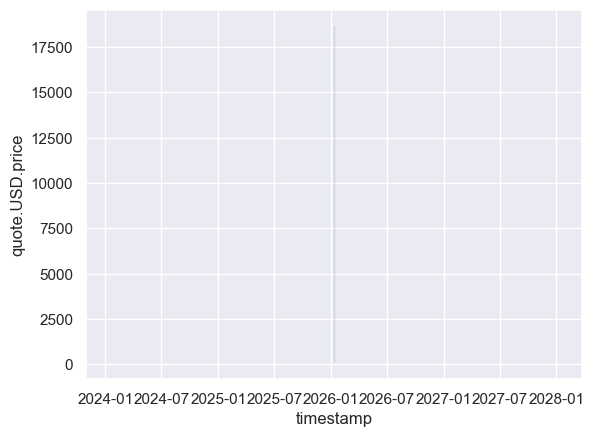

In [87]:
sns.set_theme(style='darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)